In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Reading data

df_training = pd.read_csv("training_dataset.csv")
df_eval = pd.read_csv("Evaluation_dataset.csv")
df_leader = pd.read_csv("leaderboard_dataset.csv")

# df_training.dropna(inplace = True)

# desc = df_training.describe()
# print(desc)

#df_datadict = pd.read_csv("Data_Dictionary.csv")

print("data reading complete")

# print(df_leader)
# df_training = df_training.drop(df_training.columns[[6, 9, 13, 16, 17, 18]], axis = 1)
df_training = df_training.drop(['VAR1'],axis=1)
# df_leader = df_leader.drop(df_leader.columns[[6, 9, 13, 16, 17, 18]], axis = 1)
VAR1 = df_leader.loc[:, 'VAR1']

df_leader = df_leader.drop(['VAR1'],axis=1)

print("data VAR1 dropped")
print(df_training.head())
# VAR21 = df_training.loc[:, 'VAR21']
# VAR21leader = df_leader.loc[:, 'VAR21']

# df_training = df_training.drop(['VAR21'],axis=1)
# df_leader = df_leader.drop(['VAR21'],axis=1)

# print("data VAR21 dropped")

data reading complete
data VAR1 dropped
         VAR2      VAR3        VAR4        VAR5      VAR6      VAR7  \
0  828.235294  0.138889  321.428571  625.911006  1.818182  1.081550   
1  911.764706  0.027778         NaN  611.574748  8.181818  1.344479   
2  962.352941  0.833333   35.714286  615.825381  8.181818  0.720796   
3  892.941177       NaN         NaN  638.076431  9.090909  0.820218   
4  914.117647  0.083333         NaN  626.514988  5.181818  1.372928   

         VAR8       VAR9      VAR10     VAR11       VAR12  VAR13 VAR14  VAR15  \
0  198.113469        NaN  58.632548  0.279273  100.083403    1.0     1    1.0   
1  198.600020  22.086661        NaN       NaN   15.012510    NaN     1    NaN   
2  197.267767        NaN  58.632548  0.453212  210.175146   10.0     1   10.0   
3  197.355744   4.363431  58.632548       NaN         NaN    NaN     1    NaN   
4  198.790477  85.938202  58.632548       NaN  210.175146    NaN     .    NaN   

      VAR16  VAR17  VAR18  VAR19       VAR20  

In [24]:
#replace all missing values with mean of existing values in training set
#same can be done for testing set but data leakage can occur
df_training = df_training.replace('.', np.nan)
df_training = df_training.replace('missing', np.nan)
df_training = df_training.replace('na', np.nan)
df_training = df_training.replace('N/A', np.nan)

# df_training = df_training.fillna(0)
df_training = df_training.fillna(df_training.median())

df_leader = df_leader.replace('.', np.nan)
df_leader = df_leader.replace('missing', np.nan)
df_leader = df_leader.replace('na', np.nan)
df_leader = df_leader.replace('N/A', np.nan)

# df_leader = df_leader.fillna(0)
df_leader = df_leader.fillna(df_leader.median())

print("data processed")

#df_training = (df_training - df_training.mean()) / (df_training.max() - df_training.min())
#for head in df_training:
    #df_training[head] = np.sqrt(df_training[head])

#print("data normalised")
# print(df_training)


data processed


In [25]:
#general informations

n_people = df_training.shape[0]
n_features = df_training.shape[1]-1
print("Total number of people: {}".format(n_people))
print("Number of features: {}".format(n_features))

Total number of people: 34000
Number of features: 19


In [26]:
#preparing data

# Extract feature (X) and target (y) columns
feature_cols = list(df_training.columns[:-1])  # all columns but last are features
target_col = df_training.columns[-1] # last column is the target/label
print("Feature column(s):-\n{}".format(feature_cols))
print( "Target column: {}".format(target_col))

feature_cols_leader = list(df_leader.columns[:])  # all columns but last are features

X_all = df_training[feature_cols]  # feature values for all people
y_all = df_training[target_col]  # corresponding targets/labels
y_all = y_all.replace(['Low', 'Medium', 'High'], [0, 1, 2])

X_leader = df_leader[feature_cols_leader]

print ("\nFeature values:-")
print(X_all.head())  # print the first 5 rows

X_all = X_all.convert_objects(convert_numeric=True)
X_leader = X_leader.convert_objects(convert_numeric=True)


for head in X_all:
    series = X_all[head]
    mean = series.mean()
    maximum = series.max()
    minimum = series.min()
#     series = (series - minimum)/(maximum - minimum)
    series = (series - mean)/(series.std())
    X_all[head] = series
    
for head in X_leader:
    series = X_leader[head]
    mean = series.mean()
    maximum = series.max()
    minimum = series.min()
#     series = (series - minimum)/(maximum - minimum)
    series = (series-mean)/(series.std())
    X_leader[head] = series
    

print("data normalised")

Feature column(s):-
['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20']
Target column: VAR21

Feature values:-
         VAR2      VAR3        VAR4        VAR5      VAR6      VAR7  \
0  828.235294  0.138889  321.428571  625.911006  1.818182  1.081550   
1  911.764706  0.027778  142.857143  611.574748  8.181818  1.344479   
2  962.352941  0.833333   35.714286  615.825381  8.181818  0.720796   
3  892.941177  0.166667  142.857143  638.076431  9.090909  0.820218   
4  914.117647  0.083333  142.857143  626.514988  5.181818  1.372928   

         VAR8       VAR9      VAR10     VAR11       VAR12  VAR13 VAR14  VAR15  \
0  198.113469  22.086661  58.632548  0.279273  100.083403    1.0     1    1.0   
1  198.600020  22.086661  58.632548  2.098360   15.012510   10.0     1   10.0   
2  197.267767  22.086661  58.632548  0.453212  210.175146   10.0     1   10.0   
3  197.355744   4.363431  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [27]:
# Preprocess feature columns
# def preprocess_features(X):
#     outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

#     # Check each column
#     for col, col_data in X.iteritems():
#         # If data type is non-numeric, try to replace all yes/no values with 1/0
#         if col_data.dtype == object:
#             col_data = col_data.replace(['C', 'L'], [1, 0])

#         # If still non-numeric, convert to one or more dummy variables
#         #if col_data.dtype == object:
#             #col_data = pd.get_dummies(col_data, prefix=col)

#         outX = outX.join(col_data)  # collect columns in output dataframe

#     return outX

# X_all = preprocess_features(X_all)
# X_leader = preprocess_features(X_leader)
# VAR21 = VAR21.replace('C',0)
# VAR21 = VAR21.replace('L',1)
# VAR21leader = VAR21leader.replace('C',0)
# VAR21leader = VAR21leader.replace('L',1)

# X_all = pd.concat((X_all,VAR21),axis =1)
# X_leader = pd.concat((X_leader,VAR21leader),axis =1)



print("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (19):-
['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20']


In [28]:
# preparing number of training and test samples
num_all = df_training.shape[0]  # same as len(df_training)
num_train = 27200 # about 90% of the data
num_test = num_all - num_train

# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=num_test)
print("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))
# Note: If you need a validation set, extract it from within training data

Training set: 27200 samples
Test set: 6800 samples


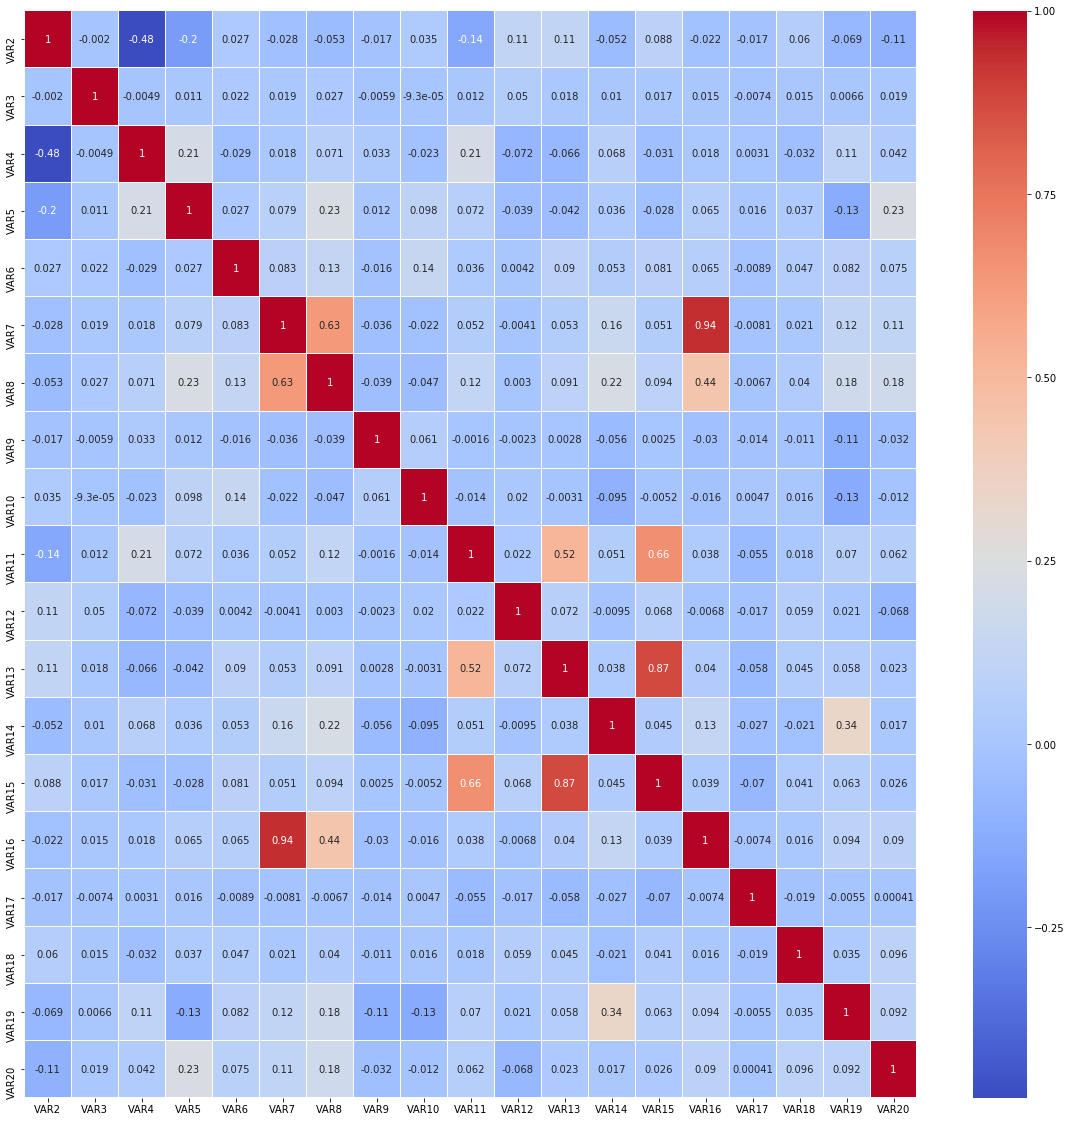

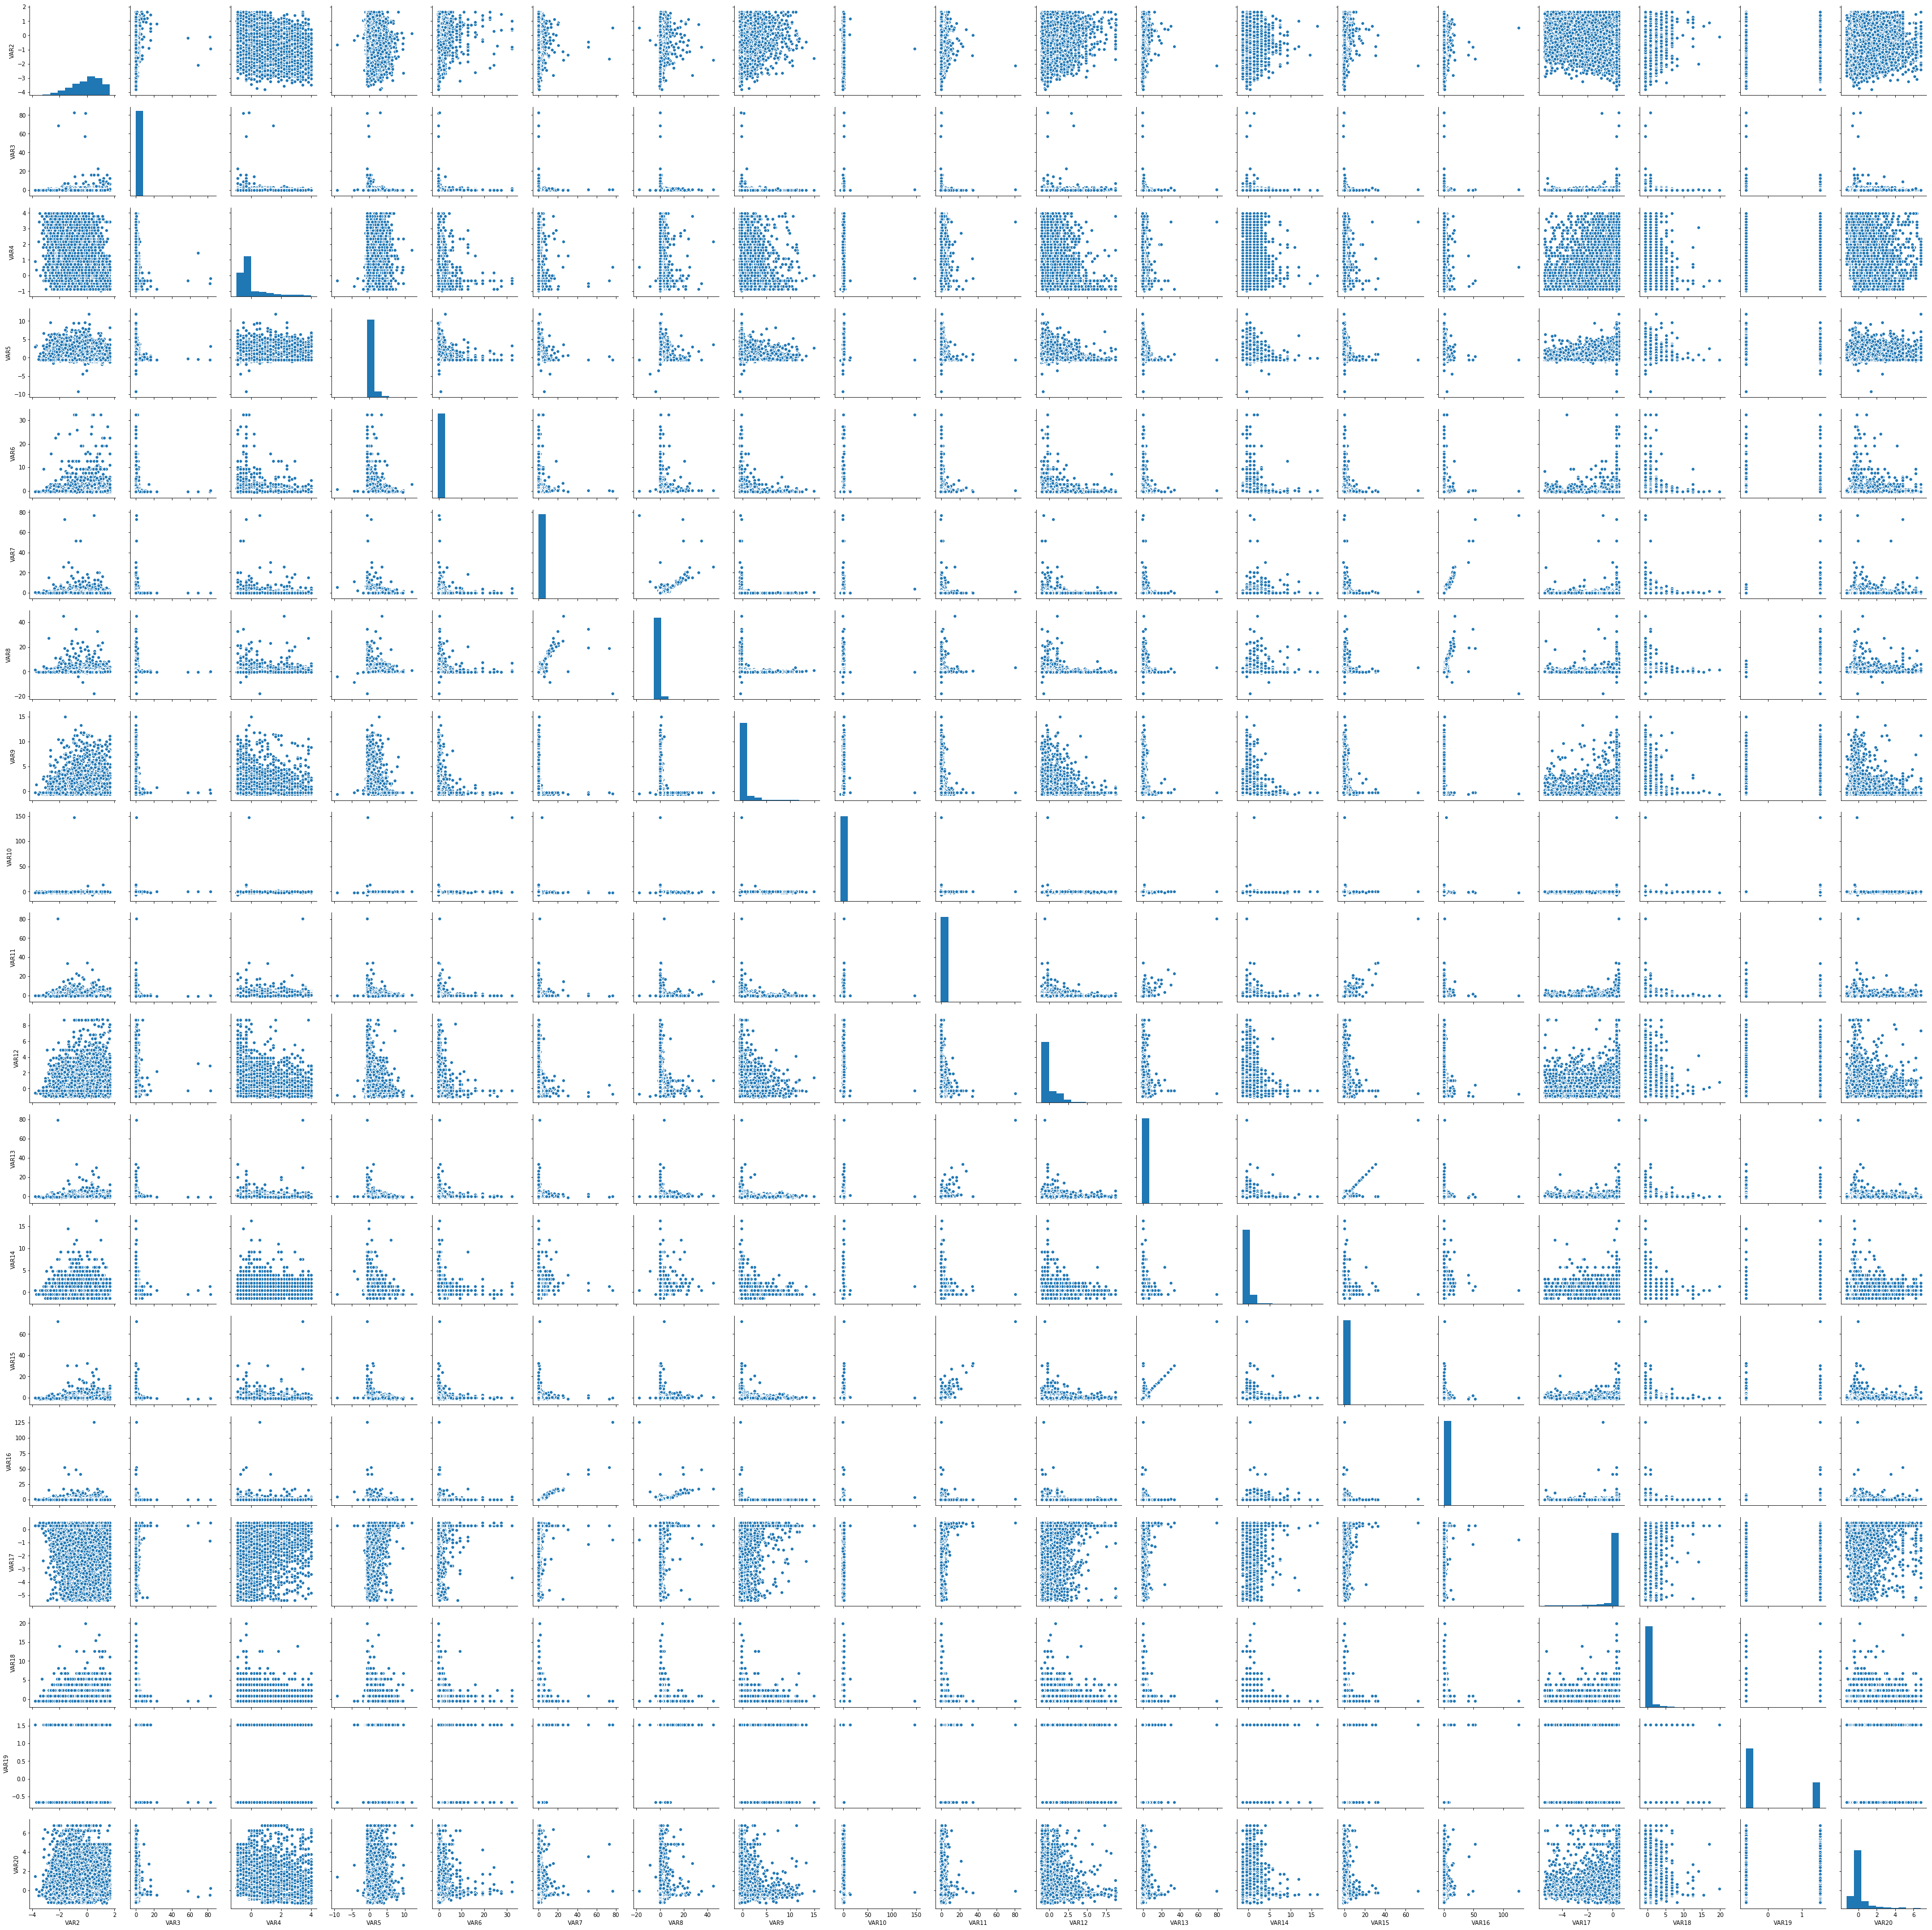

In [29]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X_train.corr(),cmap = 'coolwarm', xticklabels=True, yticklabels=True, linewidths = 0.02, annot = True)
plt.savefig('heatmap_fig_1.png')

sns.pairplot(X_train)
plt.savefig('pairplot_1.png')

In [30]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done!\nTraining time (secs): {:.3f}".format(end - start))

from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# clf = ensemble.RandomForestClassifier(n_estimators = 10, random_state = 42)
# clf = SVC(kernel = 'poly', gamma='auto')
# clf = GaussianNB()
# clf = KNeighborsClassifier(n_neighbors = 7)
# clf = HistGradientBoostingClassifier()
# clf = GradientBoostingClassifier(n_estimators = 200, max_depth = 10)
clf = XGBClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)
# feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# feature_imp

Training XGBClassifier...
Done!
Training time (secs): 6.777


In [31]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

In [32]:
from sklearn.metrics import f1_score, confusion_matrix

def predict_labels(clf, features, target):
    print("Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print( "Done!\nPrediction time (secs): {:.3f}".format(end - start))
    score  = 0
#     print(target)
    val_train = np.array(target.values)
    for val in range(0, target.shape[0]):
        if y_pred[val] == 0:
            if val_train[val] == 0:
                score = score + 1000
            elif val_train[val] == 1:
                score = score - 50
            elif val_train[val] == 2:
                score = score - 100
#             print("score -> {}".format(score))
        elif y_pred[val] == 1:
            if val_train[val] == 0:
                score = score - 100
            elif val_train[val] == 1:
                score = score + 1000
            elif val_train[val] == 2:
                score = score - 50
#             print("score -> {}".format(score))
        elif y_pred[val] == 2:
            if val_train[val] == 0:
                score = score - 200
            elif val_train[val] == 1:
                score = score - 100
            elif val_train[val] == 2:
                score = score + 1000
#             print("score -> {}".format(score))
            
    return [f1_score(target.values, y_pred, pos_label=1, average = None), f1_score(target.values, y_pred, pos_label=1, average = 'micro'), score]

train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

Predicting labels using XGBClassifier...
Done!
Prediction time (secs): 0.274
F1 score for training set: [array([0.43085036, 0.70104297, 0.11175573]), 0.5902205882352941, 15153300]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
# Predict on test data
print("F1 score for test set: {}".format(predict_labels(clf, X_test, y_test)))

predict_leader = clf.predict(X_leader)

data = {'default_ind':predict_leader}

predict_leader = pd.DataFrame.from_dict(data)

predict_leader = predict_leader.replace([0, 1, 2], ['Low', 'Medium', 'High'])


LeaderBoardFinal = pd.concat((VAR1,predict_leader),axis =1)

print(LeaderBoardFinal.shape)

LeaderBoardFinal.to_csv('Labellenouiseuse_IITRookree_14.csv',index=False,header=False)


#Now just by changing the classifier we can compare the f1 scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicting labels using XGBClassifier...
Done!
Prediction time (secs): 0.077
F1 score for test set: [array([0.40552017, 0.69356622, 0.07633588]), 0.5780882352941177, 3698750]
(10000, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print("------------------------------------------")
    print("Training set size: {}".format(len(X_train)))
    train_classifier(clf, X_train, y_train)
    print( "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {}".format(predict_labels(clf, X_test, y_test)))

train_predict(clf, X_train.sample(n=200, random_state=200), y_train.sample(n=200, random_state=200), X_test, y_test)
train_predict(clf, X_train.sample(n=100, random_state=100), y_train.sample(n=100, random_state=100), X_test, y_test)
# Note: Keep the test set constant

------------------------------------------
Training set size: 200
Training RandomForestClassifier...
Done!
Training time (secs): 0.285
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
32333    1
10149    1
7948     1
9838     0
17007    1
33263    1
3850     1
32797    0
33089    1
5655     0
21558    0
791      2
31920    0
18175    1
24671    1
11267    1
21793    1
9388     1
21933    0
25084    0
21014    2
25939    1
11998    1
5873     0
9875     1
3159     2
255      0
5987     0
22955    0
3284     0
        ..
10933    2
9752     0
17660    1
26211    1
1693     2
20389    0
4098     1
22252    1
21768    1
10004    1
33345    1
28225    0
27510    0
12785    1
22171    1
33503    1
786      0
14417    1
19076    1
17017    1
15764    0
628      1
15117    2
7478     0
15119    0
32969    0
10954    1
11759    1
11130    1
4964     0
Name: VAR21, Length: 200, dtype: int64
score -> 1000
score -> 2000
score -> 3000
score -> 4000
score -> 5000

score -> 529750
score -> 530750
score -> 531750
score -> 531700
score -> 532700
score -> 532600
score -> 532500
score -> 533500
score -> 533400
score -> 533350
score -> 533250
score -> 533150
score -> 534150
score -> 535150
score -> 535100
score -> 535000
score -> 536000
score -> 535950
score -> 535900
score -> 535800
score -> 535700
score -> 536700
score -> 537700
score -> 538700
score -> 538600
score -> 538550
score -> 539550
score -> 539500
score -> 539450
score -> 540450
score -> 541450
score -> 542450
score -> 543450
score -> 544450
score -> 544400
score -> 545400
score -> 545300
score -> 546300
score -> 547300
score -> 547100
score -> 548100
score -> 548000
score -> 547950
score -> 547900
score -> 548900
score -> 548850
score -> 549850
score -> 550850
score -> 551850
score -> 552850
score -> 552800
score -> 553800
score -> 554800
score -> 555800
score -> 556800
score -> 556750
score -> 556700
score -> 557700
score -> 557600
score -> 558600
score -> 558550
score -> 559550
score ->

score -> 978950
score -> 978900
score -> 979900
score -> 979850
score -> 979800
score -> 980800
score -> 981800
score -> 981750
score -> 982750
score -> 983750
score -> 983700
score -> 984700
score -> 985700
score -> 985600
score -> 985500
score -> 985450
score -> 986450
score -> 986350
score -> 987350
score -> 987250
score -> 987200
score -> 987100
score -> 987050
score -> 987000
score -> 988000
score -> 987900
score -> 987800
score -> 988800
score -> 988750
score -> 989750
score -> 990750
score -> 991750
score -> 992750
score -> 992700
score -> 992600
score -> 993600
score -> 993500
score -> 994500
score -> 994450
score -> 994350
score -> 995350
score -> 996350
score -> 996250
score -> 996200
score -> 997200
score -> 998200
score -> 998100
score -> 999100
score -> 999050
score -> 1000050
score -> 1001050
score -> 1002050
score -> 1003050
score -> 1004050
score -> 1005050
score -> 1004950
score -> 1004900
score -> 1005900
score -> 1006900
score -> 1007900
score -> 1008900
score -> 100

score -> 1422650
score -> 1423650
score -> 1423600
score -> 1424600
score -> 1425600
score -> 1426600
score -> 1427600
score -> 1427500
score -> 1427400
score -> 1428400
score -> 1429400
score -> 1430400
score -> 1431400
score -> 1431350
score -> 1432350
score -> 1432250
score -> 1432150
score -> 1432100
score -> 1433100
score -> 1433050
score -> 1433000
score -> 1434000
score -> 1433950
score -> 1434950
score -> 1434900
score -> 1434700
score -> 1434600
score -> 1435600
score -> 1436600
score -> 1436500
score -> 1436450
score -> 1437450
score -> 1438450
score -> 1438400
score -> 1438350
score -> 1439350
score -> 1440350
score -> 1440300
score -> 1441300
score -> 1441200
score -> 1441150
score -> 1442150
score -> 1443150
score -> 1443100
score -> 1444100
score -> 1445100
score -> 1446100
score -> 1446050
score -> 1446000
score -> 1445950
score -> 1445900
score -> 1446900
score -> 1446800
score -> 1447800
score -> 1448800
score -> 1449800
score -> 1449700
score -> 1449600
score -> 14506

score -> 1851050
score -> 1851000
score -> 1852000
score -> 1853000
score -> 1854000
score -> 1855000
score -> 1854950
score -> 1854750
score -> 1855750
score -> 1856750
score -> 1856650
score -> 1857650
score -> 1857550
score -> 1858550
score -> 1859550
score -> 1859500
score -> 1860500
score -> 1860450
score -> 1860400
score -> 1860300
score -> 1861300
score -> 1862300
score -> 1862250
score -> 1862150
score -> 1863150
score -> 1863100
score -> 1864100
score -> 1864000
score -> 1863950
score -> 1864950
score -> 1864850
score -> 1865850
score -> 1865750
score -> 1866750
score -> 1866700
score -> 1866600
score -> 1867600
score -> 1867500
score -> 1868500
score -> 1869500
score -> 1869450
score -> 1870450
score -> 1871450
score -> 1872450
score -> 1873450
score -> 1874450
score -> 1875450
score -> 1875400
score -> 1875350
score -> 1875250
score -> 1876250
score -> 1876150
score -> 1877150
score -> 1878150
score -> 1878100
score -> 1878000
score -> 1877900
score -> 1877800
score -> 18777

score -> 2309400
score -> 2310400
score -> 2310300
score -> 2311300
score -> 2312300
score -> 2313300
score -> 2313200
score -> 2314200
score -> 2314150
score -> 2315150
score -> 2316150
score -> 2317150
score -> 2318150
score -> 2319150
score -> 2320150
score -> 2320100
score -> 2320050
score -> 2321050
score -> 2322050
score -> 2321950
score -> 2322950
score -> 2323950
score -> 2324950
score -> 2325950
score -> 2325850
score -> 2326850
score -> 2327850
score -> 2328850
score -> 2329850
score -> 2330850
score -> 2330800
score -> 2331800
score -> 2332800
score -> 2332750
score -> 2332650
score -> 2332600
score -> 2333600
score -> 2334600
score -> 2335600
score -> 2335550
score -> 2335450
score -> 2335350
score -> 2335250
score -> 2336250
score -> 2336150
score -> 2336050
score -> 2337050
score -> 2338050
score -> 2339050
score -> 2338950
score -> 2339950
score -> 2340950
score -> 2340900
score -> 2340800
score -> 2340750
score -> 2340700
score -> 2340650
score -> 2341650
score -> 23426

score -> 2757650
score -> 2758650
score -> 2758600
score -> 2759600
score -> 2760600
score -> 2760550
score -> 2761550
score -> 2761450
score -> 2761400
score -> 2762400
score -> 2762300
score -> 2762250
score -> 2763250
score -> 2763150
score -> 2763050
score -> 2764050
score -> 2765050
score -> 2765000
score -> 2764900
score -> 2765900
score -> 2765800
score -> 2766800
score -> 2766750
score -> 2766650
score -> 2767650
score -> 2767600
score -> 2768600
score -> 2769600
score -> 2770600
score -> 2771600
score -> 2771500
score -> 2772500
score -> 2773500
score -> 2774500
score -> 2775500
score -> 2776500
score -> 2777500
score -> 2777450
score -> 2778450
score -> 2778400
score -> 2779400
score -> 2779300
score -> 2779250
score -> 2780250
score -> 2780150
score -> 2780050
score -> 2780000
score -> 2779900
score -> 2780900
score -> 2781900
score -> 2782900
score -> 2782850
score -> 2782800
score -> 2782600
score -> 2782500
score -> 2782450
score -> 2783450
score -> 2783350
score -> 27843

score -> 79900
score -> 80900
score -> 81900
score -> 82900
score -> 83900
score -> 84900
score -> 85900
score -> 86900
score -> 87900
score -> 87850
score -> 88850
score -> 89850
score -> 90850
score -> 91850
score -> 92850
score -> 93850
score -> 94850
score -> 95850
score -> 96850
score -> 97850
F1 score for training set: [array([0.98461538, 0.98113208, 0.96551724]), 0.98, 97850]
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.027
32436    0
13765    1
26894    0
17734    1
29136    0
30382    1
32108    0
1163     1
33684    1
25503    1
9305     2
30432    1
10515    1
23764    0
11476    1
30828    0
27501    0
25158    1
16175    0
7680     0
20845    0
32924    1
13107    1
29452    1
16303    0
24413    2
13986    1
20401    1
20016    1
30270    0
        ..
31965    0
32465    1
24489    1
31814    1
33393    2
24522    1
13763    0
11828    1
5962     1
28020    0
32350    1
29760    2
14537    1
1153     1
8760     1
30505    1
21176    1


score -> 295350
score -> 295300
score -> 296300
score -> 296250
score -> 296150
score -> 296100
score -> 297100
score -> 297000
score -> 298000
score -> 297950
score -> 298950
score -> 299950
score -> 300950
score -> 301950
score -> 301850
score -> 301800
score -> 301700
score -> 302700
score -> 302600
score -> 302550
score -> 303550
score -> 304550
score -> 304500
score -> 305500
score -> 305400
score -> 305300
score -> 306300
score -> 306250
score -> 306200
score -> 307200
score -> 308200
score -> 308100
score -> 308000
score -> 309000
score -> 310000
score -> 309950
score -> 310950
score -> 310850
score -> 311850
score -> 312850
score -> 313850
score -> 313750
score -> 314750
score -> 314650
score -> 314600
score -> 315600
score -> 315550
score -> 315450
score -> 315350
score -> 316350
score -> 316250
score -> 317250
score -> 318250
score -> 319250
score -> 320250
score -> 320200
score -> 321200
score -> 321100
score -> 321000
score -> 320900
score -> 320850
score -> 321850
score ->

score -> 741650
score -> 741550
score -> 742550
score -> 742500
score -> 743500
score -> 744500
score -> 745500
score -> 745400
score -> 745300
score -> 746300
score -> 746200
score -> 747200
score -> 748200
score -> 749200
score -> 749000
score -> 750000
score -> 749900
score -> 749800
score -> 749750
score -> 749650
score -> 750650
score -> 750600
score -> 750500
score -> 751500
score -> 751400
score -> 752400
score -> 752350
score -> 753350
score -> 753250
score -> 753200
score -> 753150
score -> 754150
score -> 755150
score -> 756150
score -> 756100
score -> 756000
score -> 757000
score -> 758000
score -> 757900
score -> 758900
score -> 758800
score -> 759800
score -> 760800
score -> 761800
score -> 761700
score -> 762700
score -> 762600
score -> 763600
score -> 763550
score -> 764550
score -> 764450
score -> 764400
score -> 764350
score -> 764300
score -> 765300
score -> 765200
score -> 765100
score -> 766100
score -> 767100
score -> 767050
score -> 766950
score -> 767950
score ->

score -> 1147350
score -> 1148350
score -> 1149350
score -> 1149300
score -> 1149200
score -> 1150200
score -> 1151200
score -> 1152200
score -> 1152150
score -> 1153150
score -> 1153100
score -> 1154100
score -> 1155100
score -> 1155050
score -> 1156050
score -> 1157050
score -> 1156950
score -> 1157950
score -> 1157850
score -> 1157750
score -> 1157700
score -> 1157600
score -> 1158600
score -> 1159600
score -> 1160600
score -> 1161600
score -> 1162600
score -> 1163600
score -> 1163500
score -> 1163450
score -> 1163400
score -> 1163300
score -> 1164300
score -> 1165300
score -> 1165200
score -> 1166200
score -> 1167200
score -> 1168200
score -> 1169200
score -> 1169100
score -> 1170100
score -> 1171100
score -> 1172100
score -> 1172050
score -> 1172000
score -> 1173000
score -> 1174000
score -> 1173950
score -> 1174950
score -> 1175950
score -> 1175900
score -> 1175800
score -> 1175700
score -> 1176700
score -> 1177700
score -> 1178700
score -> 1179700
score -> 1179650
score -> 11806

score -> 1615750
score -> 1615650
score -> 1616650
score -> 1616600
score -> 1616500
score -> 1616400
score -> 1616300
score -> 1617300
score -> 1618300
score -> 1619300
score -> 1620300
score -> 1621300
score -> 1622300
score -> 1622200
score -> 1623200
score -> 1623100
score -> 1623050
score -> 1622850
score -> 1623850
score -> 1623750
score -> 1624750
score -> 1625750
score -> 1626750
score -> 1626550
score -> 1626450
score -> 1626400
score -> 1626350
score -> 1626250
score -> 1627250
score -> 1627150
score -> 1628150
score -> 1629150
score -> 1630150
score -> 1631150
score -> 1632150
score -> 1633150
score -> 1634150
score -> 1634050
score -> 1634000
score -> 1635000
score -> 1636000
score -> 1635900
score -> 1636900
score -> 1637900
score -> 1638900
score -> 1638850
score -> 1638750
score -> 1638700
score -> 1638650
score -> 1638600
score -> 1638500
score -> 1639500
score -> 1639400
score -> 1640400
score -> 1640300
score -> 1641300
score -> 1641200
score -> 1641100
score -> 16410

score -> 2268400
score -> 2268300
score -> 2268250
score -> 2268200
score -> 2269200
score -> 2270200
score -> 2271200
score -> 2272200
score -> 2273200
score -> 2273000
score -> 2274000
score -> 2273950
score -> 2273850
score -> 2273750
score -> 2274750
score -> 2274650
score -> 2275650
score -> 2275600
score -> 2275500
score -> 2275450
score -> 2275350
score -> 2276350
score -> 2276300
score -> 2276200
score -> 2276150
score -> 2276100
score -> 2276000
score -> 2275950
score -> 2275850
score -> 2275750
score -> 2275650
score -> 2275600
score -> 2275550
score -> 2276550
score -> 2277550
score -> 2277500
score -> 2277300
score -> 2277250
score -> 2278250
score -> 2279250
score -> 2279200
score -> 2280200
score -> 2281200
score -> 2282200
score -> 2283200
score -> 2283150
score -> 2284150
score -> 2285150
score -> 2286150
score -> 2287150
score -> 2288150
score -> 2288050
score -> 2287950
score -> 2288950
score -> 2288900
score -> 2289900
score -> 2289800
score -> 2289700
score -> 22896

score -> 2712000
score -> 2711950
score -> 2711850
score -> 2711800
score -> 2711700
score -> 2712700
score -> 2712600
score -> 2713600
score -> 2714600
score -> 2714500
score -> 2715500
score -> 2715400
score -> 2716400
score -> 2717400
score -> 2717300
score -> 2717250
score -> 2717200
score -> 2717100
score -> 2717000
score -> 2716900
score -> 2716850
score -> 2717850
score -> 2717750
score -> 2717650
score -> 2717600
score -> 2717550
score -> 2717450
score -> 2717400
score -> 2717350
score -> 2717250
score -> 2718250
score -> 2719250
score -> 2719200
score -> 2719100
score -> 2719000
score -> 2718950
score -> 2718850
score -> 2719850
score -> 2719750
score -> 2720750
score -> 2721750
score -> 2722750
score -> 2723750
score -> 2723650
score -> 2723550
score -> 2724550
score -> 2724500
score -> 2724400
score -> 2724300
score -> 2724250
score -> 2725250
score -> 2726250
score -> 2726150
score -> 2726100
score -> 2727100
score -> 2727050
score -> 2727000
score -> 2726950
score -> 27269

In [28]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
train_predict(dtc, X_train, y_train, X_test, y_test)
train_predict(dtc, X_train.sample(n=200, random_state=202), y_train.sample(n=200, random_state=202), X_test, y_test)
train_predict(dtc, X_train.sample(n=100, random_state=102), y_train.sample(n=100, random_state=102), X_test, y_test)

------------------------------------------
Training set size: 72000
Training DecisionTreeClassifier...
Done!
Training time (secs): 2.868
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.031
F1 score for training set: 0.9999436587976788
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.4649761486316846
------------------------------------------
Training set size: 200
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.016
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.4490285440153514
------------------------------------------
Training set size: 100
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.000
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1

In [ ]:
#choosing the best model

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 500)}
sss = cross_validation.StratifiedShuffleSplit(y_train, test_size=num_test)
gs = GridSearchCV(estimator=clf, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1), param_grid=parameters,
                  cv=sss)
gs.fit(X_train, y_train)
best_estimator = gs.best_estimator_
print("best estimator:\n{}".format(best_estimator))
print ('')
print("best parameter:\n{}".format(gs.best_params_))
print('')
print("F1 score:\n{}".format(f1_score(y_test, best_estimator.predict(X_test), pos_label=1)))


C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
